In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [ ]:
!pip install kaggle
import os

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"shivangikochrekar","key":"0c6d0fd8197597c427f1463f57c8278b"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d einsteindata4u/covid19

  0% 0.00/556k [00:00<?, ?B/s]
100% 556k/556k [00:00<00:00, 36.4MB/s]


In [ ]:
!unzip covid19.zip 

Archive:  covid19.zip
  inflating: dataset.xlsx            


In [ ]:
dataset=pd.read_excel('/content/dataset.xlsx',index_col=0)

In [ ]:
# checking first thirty rows of our dataset
pd.set_option("display.max_rows",500)
pd.set_option("display.max_columns",500)
dataset.head(30)

,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),Serum Glucose,Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Mycoplasma pneumoniae,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2,Neutrophils,Urea,Proteina C reativa mg/dL,Creatinine,Potassium,Sodium,"Influenza B, rapid test","Influenza A, rapid test",Alanine transaminase,Aspartate transaminase,Gamma-glutamyltransferase,Total Bilirubin,Direct Bilirubin,Indirect Bilirubin,Alkaline phosphatase,Ionized calcium,Strepto A,Magnesium,pCO2 (venous blood gas analysis),Hb saturation (venous blood gas analysis),Base excess (venous blood gas analysis),pO2 (venous blood gas analysis),Fio2 (venous blood gas analysis),Total CO2 (venous blood gas analysis),pH (venous blood gas analysis),HCO3 (venous blood gas analysis),Rods #,Segmented,Promyelocytes,Metamyelocytes,Myelocytes,Myeloblasts,Urine - Esterase,Urine - Aspect,Urine - pH,Urine - Hemoglobin,Urine - Bile pigments,Urine - Ketone Bodies,Urine - Nitrite,Urine - Density,Urine - Urobilinogen,Urine - Protein,Urine - Sugar,Urine - Leukocytes,Urine - Crystals,Urine - Red blood cells,Urine - Hyaline cylinders,Urine - Granular cylinders,Urine - Yeasts,Urine - Color,Partial thromboplastin time (PTT),Relationship (Patient/Normal),International normalized ratio (INR),Lactic Dehydrogenase,"Prothrombin time (PT), Activity",Vitamin B12,Creatine phosphokinase (CPK),Ferritin,Arterial Lactic Acid,Lipase dosage,D-Dimer,Albumin,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
Patient ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
44477f75e8169d2,13,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
126e9dd13932f68,17,negative,0,0,0,0.236515,-0.022340,-0.517413,0.010677,0.102004,0.318366,-0.950790,-0.094610,-0.223767,-0.292269,1.482158,0.166192,0.357547,-0.625073,-0.140648,not_detected,not_detected,not_detected,not_detected,not_detected,detected,NaN,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,-0.619086,1.198059,-0.147895,2.089928,-0.305787,0.862512,negative,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
a46b4402a0e5696,8,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [ ]:
dataset.shape

(5644, 110)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5644 entries, 44477f75e8169d2 to 2697fdccbfeb7f7
Columns: 110 entries, Patient age quantile to ctO2 (arterial blood gas analysis)
dtypes: float64(70), int64(4), object(36)
memory usage: 4.8+ MB


In [ ]:
dataset.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Patient age quantile,5644,NaN,NaN,NaN,9.31839,5.7779,0,4,9,14,19
SARS-Cov-2 exam result,5644,2,negative,5086,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Patient addmited to regular ward (1=yes, 0=no)",5644,NaN,NaN,NaN,0.0139972,0.117489,0,0,0,0,1
"Patient addmited to semi-intensive unit (1=yes, 0=no)",5644,NaN,NaN,NaN,0.00885897,0.0937125,0,0,0,0,1
"Patient addmited to intensive care unit (1=yes, 0=no)",5644,NaN,NaN,NaN,0.00726435,0.0849286,0,0,0,0,1
Hematocrit,603,NaN,NaN,NaN,-2.18621e-09,1.00083,-4.50142,-0.518807,0.053407,0.717175,2.6627
Hemoglobin,603,NaN,NaN,NaN,-1.60132e-08,1.00083,-4.3456,-0.586244,0.040316,0.729532,2.67187
Platelets,602,NaN,NaN,NaN,-3.535e-10,1.00083,-2.55243,-0.605346,-0.121716,0.531498,9.53203
Mean platelet volume,599,NaN,NaN,NaN,7.43814e-09,1.00084,-2.45757,-0.662483,-0.101517,0.683835,3.71305
Red blood Cells,602,NaN,NaN,NaN,8.42445e-09,1.00083,-3.97061,-0.56795,0.0138521,0.666176,3.64571


In [ ]:
print("\nNumber of Positive and Negative Cases of SARS-COV-2")
dataset['SARS-Cov-2 exam result'].value_counts()


Number of Positive and Negative Cases of SARS-COV-2


negative    5086
positive     558
Name: SARS-Cov-2 exam result, dtype: int64

In [ ]:
dataset.drop(columns=['Patient addmited to regular ward (1=yes, 0=no)',
                      'Patient addmited to semi-intensive unit (1=yes, 0=no)',
                      'Patient addmited to intensive care unit (1=yes, 0=no)'], inplace=True)

In [ ]:
total_null_values = dataset.isnull().sum().sort_values(ascending=False) 
not_null_values = dataset.notnull().sum().sort_values(ascending=False) 
null_values_percentage = (dataset.isnull().sum()/dataset.notnull().count().sort_values(ascending=False)) * 100

dataset_missing_values = pd.concat({'Null': total_null_values, 'Not Null': not_null_values, 'Percentage': null_values_percentage}, axis=1)

dataset_missing_values

,Null,Not Null,Percentage
Mycoplasma pneumoniae,5644,0,100.000000
Urine - Sugar,5644,0,100.000000
Partial thromboplastin time (PTT),5644,0,100.000000
"Prothrombin time (PT), Activity",5644,0,100.000000
D-Dimer,5644,0,100.000000
Fio2 (venous blood gas analysis),5643,1,99.982282
Urine - Nitrite,5643,1,99.982282
Vitamin B12,5641,3,99.946846
Lipase dosage,5636,8,99.858257
Albumin,5631,13,99.769667


In [ ]:
dataset_missing_values[dataset_missing_values['Percentage']==100]

,Null,Not Null,Percentage
Mycoplasma pneumoniae,5644,0,100.0
Urine - Sugar,5644,0,100.0
Partial thromboplastin time (PTT),5644,0,100.0
"Prothrombin time (PT), Activity",5644,0,100.0
D-Dimer,5644,0,100.0


In [ ]:
dataset_missing_values[dataset_missing_values['Not Null'] <= 6]

,Null,Not Null,Percentage
Mycoplasma pneumoniae,5644,0,100.000000
Urine - Sugar,5644,0,100.000000
Partial thromboplastin time (PTT),5644,0,100.000000
"Prothrombin time (PT), Activity",5644,0,100.000000
D-Dimer,5644,0,100.000000
Fio2 (venous blood gas analysis),5643,1,99.982282
Urine - Nitrite,5643,1,99.982282
Vitamin B12,5641,3,99.946846


In [ ]:
dataset.drop(columns=['Mycoplasma pneumoniae','Urine - Sugar','Prothrombin time (PT), Activity','D-Dimer','Fio2 (venous blood gas analysis)','Urine - Nitrite','Vitamin B12'], inplace=True)

In [ ]:
dataset = dataset.fillna(0)

In [ ]:
dataset.replace('not_detected', 0, inplace=True)
dataset.replace('detected', 0, inplace=True)
dataset.replace('absent', 0, inplace=True)
dataset.replace('present', 1, inplace=True)
dataset.replace('negative', 0, inplace=True)
dataset.replace('positive', 1, inplace=True)

In [ ]:
dataset

,Patient age quantile,SARS-Cov-2 exam result,Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),Serum Glucose,Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2,Neutrophils,Urea,Proteina C reativa mg/dL,Creatinine,Potassium,Sodium,"Influenza B, rapid test","Influenza A, rapid test",Alanine transaminase,Aspartate transaminase,Gamma-glutamyltransferase,Total Bilirubin,Direct Bilirubin,Indirect Bilirubin,Alkaline phosphatase,Ionized calcium,Strepto A,Magnesium,pCO2 (venous blood gas analysis),Hb saturation (venous blood gas analysis),Base excess (venous blood gas analysis),pO2 (venous blood gas analysis),Total CO2 (venous blood gas analysis),pH (venous blood gas analysis),HCO3 (venous blood gas analysis),Rods #,Segmented,Promyelocytes,Metamyelocytes,Myelocytes,Myeloblasts,Urine - Esterase,Urine - Aspect,Urine - pH,Urine - Hemoglobin,Urine - Bile pigments,Urine - Ketone Bodies,Urine - Density,Urine - Urobilinogen,Urine - Protein,Urine - Leukocytes,Urine - Crystals,Urine - Red blood cells,Urine - Hyaline cylinders,Urine - Granular cylinders,Urine - Yeasts,Urine - Color,Partial thromboplastin time (PTT),Relationship (Patient/Normal),International normalized ratio (INR),Lactic Dehydrogenase,Creatine phosphokinase (CPK),Ferritin,Arterial Lactic Acid,Lipase dosage,Albumin,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
Patient ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
44477f75e8169d2,13,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0.000000,0,0,0,0,0.000000,0,0,0,0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
126e9dd13932f68,17,0,0.236515,-0.022340,-0.517413,0.010677,0.102004,0.318366,-0.950790,-0.094610,-0.223767,-0.292269,1.482158,0.166192,0.357547,-0.625073,-0.140648,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.619086,1.198059,-0.147895,2.089928,-0.305787,0.862512,0,0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0.000000,0,0,0,0,0.000000,0,0,0,0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
a46b4402a0e5696,8,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0.000000,0,0,0,0,0.000000,0,0,0,0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
f7d619a94f97c45,5,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0

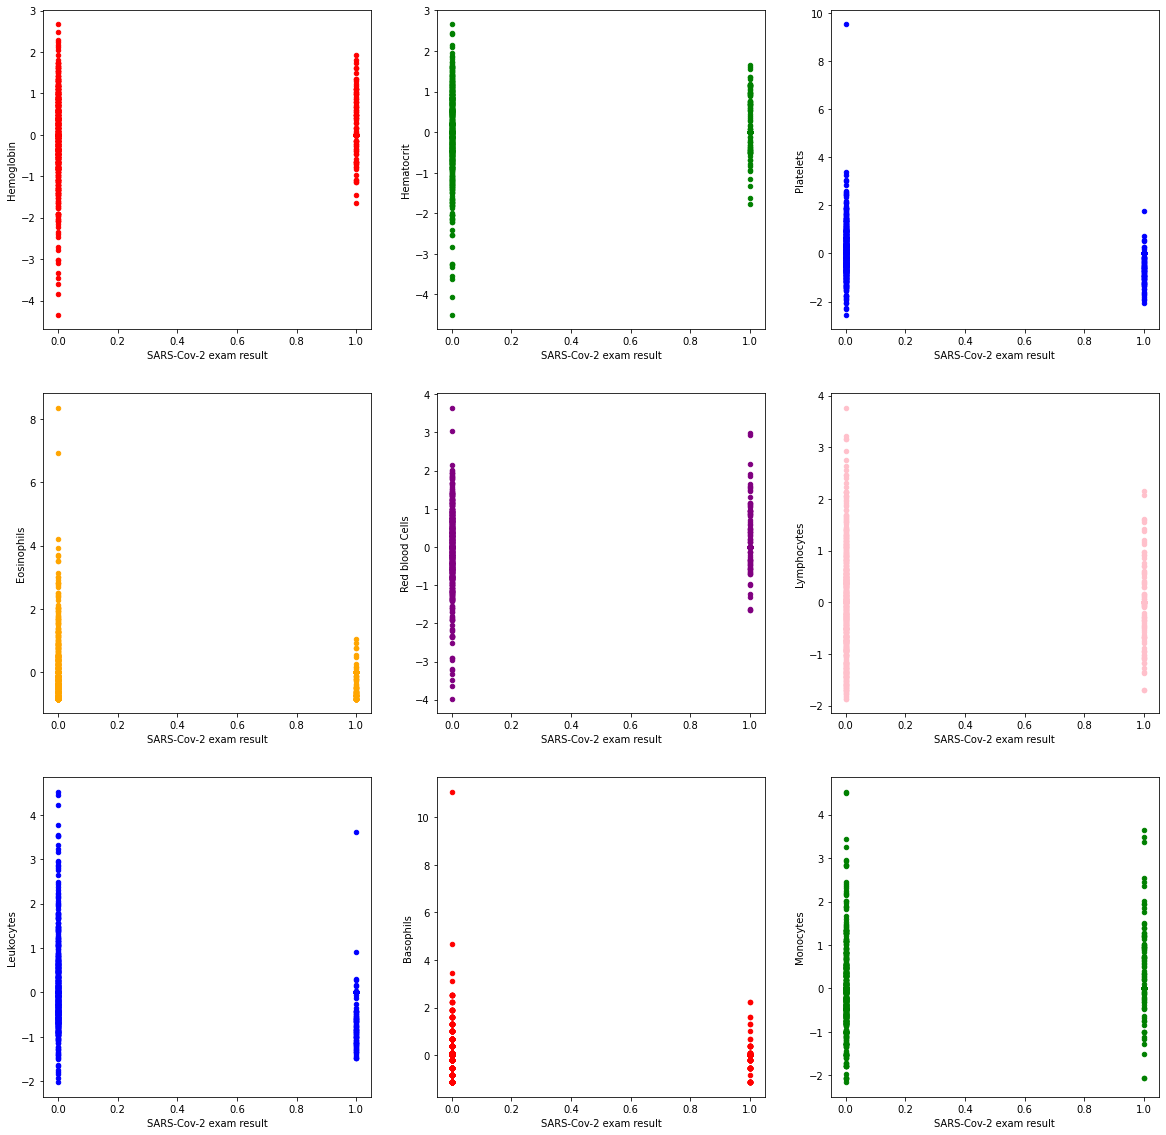

In [ ]:
# visualize the relationship between the features and the target using scatterplots
fig, axs = plt.subplots(3, 3, figsize=(20, 20))
dataset.plot(kind='scatter', x='SARS-Cov-2 exam result', y='Hemoglobin',ax=axs[0,0], c='red')
dataset.plot(kind='scatter',  x='SARS-Cov-2 exam result', y='Hematocrit', ax=axs[0,1], c='green')
dataset.plot(kind='scatter', x='SARS-Cov-2 exam result', y='Platelets',ax=axs[0,2], c='blue')
dataset.plot(kind='scatter',  x='SARS-Cov-2 exam result', y='Eosinophils', ax=axs[1,0], c='orange')
dataset.plot(kind='scatter', x='SARS-Cov-2 exam result', y='Red blood Cells',ax=axs[1,1], c='purple')
dataset.plot(kind='scatter',  x='SARS-Cov-2 exam result', y='Lymphocytes', ax=axs[1,2], c='pink')
dataset.plot(kind='scatter', x='SARS-Cov-2 exam result', y='Leukocytes',ax=axs[2,0], c='blue')
dataset.plot(kind='scatter',  x='SARS-Cov-2 exam result', y='Basophils', ax=axs[2,1], c='red')
dataset.plot(kind='scatter',  x='SARS-Cov-2 exam result', y='Monocytes', ax=axs[2,2], c='green')

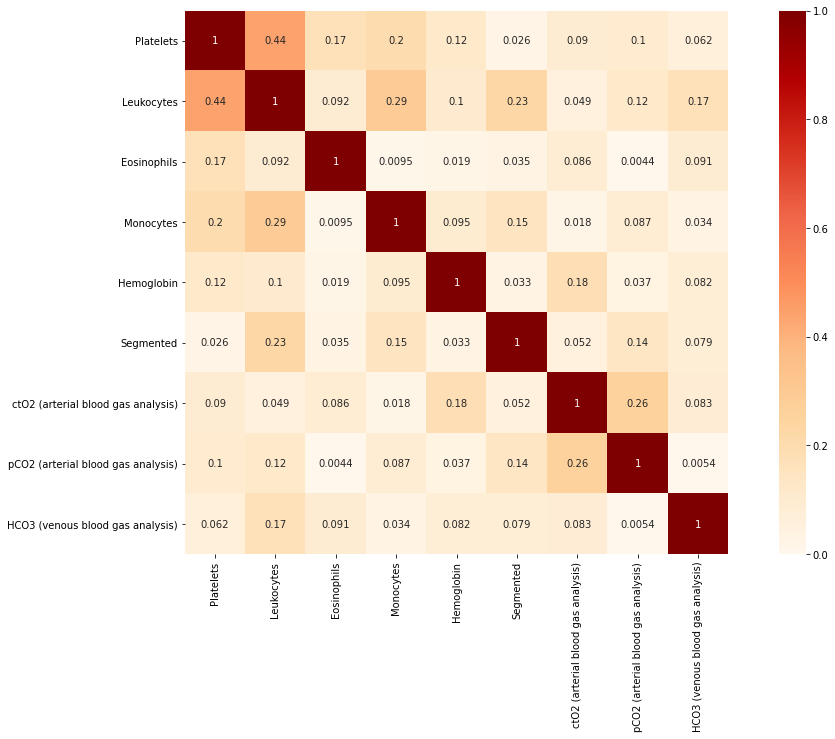

In [ ]:
# visualize the relationship between the data points using heatmap
corr_matrix = abs(dataset.corr())

corr_target = corr_matrix["SARS-Cov-2 exam result"]

relevant_features = ["Platelets","Leukocytes","Eosinophils","Monocytes","Hemoglobin","Segmented","ctO2 (arterial blood gas analysis)","pCO2 (arterial blood gas analysis)","HCO3 (venous blood gas analysis)"]

# plotting the heatmap
fig, axs = plt.subplots(figsize=(18, 10))
sns.heatmap(abs(dataset[relevant_features].corr()), yticklabels=relevant_features, xticklabels=relevant_features, vmin = 0.0, square=True, annot=True, vmax=1.0, cmap='OrRd')

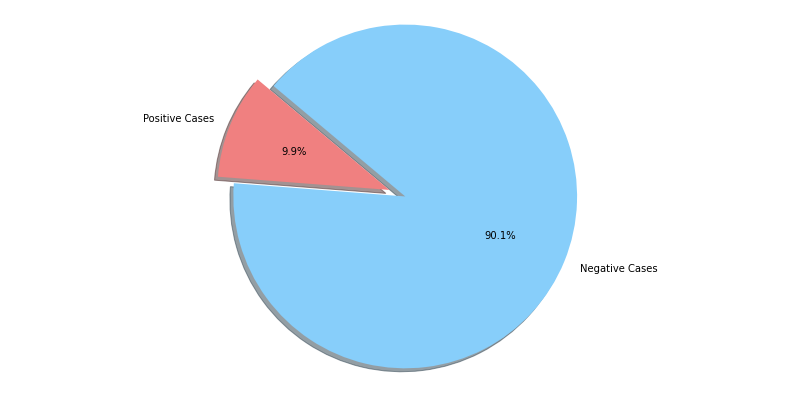

In [ ]:
# visualize positive cases vs negative cases
dataset_negative = dataset['SARS-Cov-2 exam result'] == 0
dataset_positive = dataset['SARS-Cov-2 exam result'] == 1

labels = 'Positive Cases', 'Negative Cases'
sizes = [dataset_positive.sum(), dataset_negative.sum()]
colors = ['lightcoral', 'lightskyblue']
explode = (0.1, 0) 

fig, axs = plt.subplots(figsize=(14, 7))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
from sklearn.model_selection import train_test_split
target = dataset['SARS-Cov-2 exam result']

features = dataset.select_dtypes(exclude=[object])

X_train,X_test,y_train,y_test = train_test_split(features, target, test_size=0.3, random_state=42, stratify = target)

In [ ]:
print("Number of samples in train set: %d" % y_train.shape)
print("Number of positive samples in train set: %d" % (y_train == 1).sum(axis=0))
print("Number of negative samples in train set: %d" % (y_train == 0).sum(axis=0))
print()
print("Number of samples in test set: %d" % y_test.shape)
print("Number of positive samples in test set: %d" % (y_test == 1).sum(axis=0))
print("Number of negative samples in test set: %d" % (y_test == 0).sum(axis=0))

Number of samples in train set: 3950
Number of positive samples in train set: 391
Number of negative samples in train set: 3559

Number of samples in test set: 1694
Number of positive samples in test set: 167
Number of negative samples in test set: 1527


In [ ]:
from IPython.display import display_html

X_train_data = X_train.describe().style.set_table_attributes("style='display:inline'").set_caption('Summary of Training Data')
X_test_data = X_test.describe().style.set_table_attributes("style='display:inline'").set_caption('Summary of Testing Data')

display_html(X_train_data._repr_html_(), raw = True)
display_html(X_test_data._repr_html_(), raw = True)

,Patient age quantile,SARS-Cov-2 exam result,Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),Serum Glucose,Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2,Neutrophils,Urea,Proteina C reativa mg/dL,Creatinine,Potassium,Sodium,"Influenza B, rapid test","Influenza A, rapid test",Alanine transaminase,Aspartate transaminase,Gamma-glutamyltransferase,Total Bilirubin,Direct Bilirubin,Indirect Bilirubin,Alkaline phosphatase,Ionized calcium,Magnesium,pCO2 (venous blood gas analysis),Hb saturation (venous blood gas analysis),Base excess (venous blood gas analysis),pO2 (venous blood gas analysis),Total CO2 (venous blood gas analysis),pH (venous blood gas analysis),HCO3 (venous blood gas analysis),Rods #,Segmented,Promyelocytes,Metamyelocytes,Myelocytes,Myeloblasts,Urine - Density,Urine - Red blood cells,Urine - Hyaline cylinders,Urine - Granular cylinders,Urine - Yeasts,Partial thromboplastin time (PTT),Relationship (Patient/Normal),International normalized ratio (INR),Lactic Dehydrogenase,Creatine phosphokinase (CPK),Ferritin,Arterial Lactic Acid,Lipase dosage,Albumin,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
count,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000
mean,9.254177,0.098987,0.002785,0.003590,0.005637,-0.001059,0.004458,0.004717,0.003713,0.001598,0.001392,-0.002743,0.004889,-0.004696,-0.000297,-0.002991,-0.000331,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.003478,-0.000473,-0.000835,0.001118,0.002423,-0.002729,0.008608,0.009873,0.002143,0.001309,-0.000344,0.000011,-0.000839,0.000726,-0.000604,-0.001110,0.000055,0.001327,0.000442,0.000435,0.000345,0.000826,-0.000716,0.000782,-0.002391,0.000138,0.000775,-0.000459,-0.001664,0.000000,0.001454,-0.001094,0.000000,0.000000,0.000000,0.000000,0.001504,-0.000761,0.001863,-0.000690,0.000503,-0.001043,-0.000185,0.000799,0.000923,-0.001912,0.000819,0.001973,-0.000946,-0.000766,0.000278,-0.000334,-0.000605,-0.000272
std,5.775991,0.298683,0.320375,0.323831,0.335154,0.325955,0.317934,0.325595,0.334381,0.323793,0.290016,0.320451,0.340180,0.327365,0.314322,0.335370,0.189123,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.

,Patient age quantile,SARS-Cov-2 exam result,Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),Serum Glucose,Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2,Neutrophils,Urea,Proteina C reativa mg/dL,Creatinine,Potassium,Sodium,"Influenza B, rapid test","Influenza A, rapid test",Alanine transaminase,Aspartate transaminase,Gamma-glutamyltransferase,Total Bilirubin,Direct Bilirubin,Indirect Bilirubin,Alkaline phosphatase,Ionized calcium,Magnesium,pCO2 (venous blood gas analysis),Hb saturation (venous blood gas analysis),Base excess (venous blood gas analysis),pO2 (venous blood gas analysis),Total CO2 (venous blood gas analysis),pH (venous blood gas analysis),HCO3 (venous blood gas analysis),Rods #,Segmented,Promyelocytes,Metamyelocytes,Myelocytes,Myeloblasts,Urine - Density,Urine - Red blood cells,Urine - Hyaline cylinders,Urine - Granular cylinders,Urine - Yeasts,Partial thromboplastin time (PTT),Relationship (Patient/Normal),International normalized ratio (INR),Lactic Dehydrogenase,Creatine phosphokinase (CPK),Ferritin,Arterial Lactic Acid,Lipase dosage,Albumin,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
count,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000
mean,9.468123,0.098583,-0.006495,-0.008371,-0.013144,0.002469,-0.010396,-0.011000,-0.008658,-0.003725,-0.003246,0.006396,-0.011400,0.010951,0.000692,0.006975,0.000771,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.008110,0.001103,0.001948,-0.002606,-0.005649,0.006364,0.008855,0.007674,-0.004997,-0.003052,0.000802,-0.000026,0.001956,-0.001693,0.001408,0.002589,-0.000129,-0.003094,-0.001030,-0.001013,-0.000805,-0.001926,0.001669,-0.001824,0.005575,-0.000323,-0.001807,0.001070,0.003881,0.000000,-0.003391,0.002551,0.000000,0.000000,0.000000,0.000000,-0.003508,0.001775,-0.004344,0.001610,-0.001174,0.002432,0.000431,-0.001863,-0.002151,0.004458,-0.001909,-0.004599,0.002205,0.001786,-0.000647,0.000779,0.001410,0.000634
std,5.781296,0.298190,0.341612,0.333866,0.305490,0.325538,0.345902,0.328832,0.307688,0.333187,0.399222,0.340584,0.292350,0.324710,0.352901,0.305228,0.198566,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000

In [ ]:
from sklearn.metrics import accuracy_score

knn=KNeighborsClassifier().fit(X_train,y_train)
ypred = knn.predict(X_test)
KNN_score=accuracy_score(y_test, ypred)
print("Train set Accuracy is {}  ".format(accuracy_score(y_train, knn.predict(X_train))))
print("Test set Accuracy is {}".format(KNN_score))
print("\n")

Train set Accuracy is 0.9936708860759493  
Test set Accuracy is 0.9964580873671782




[[1527    0]
 [   6  161]]


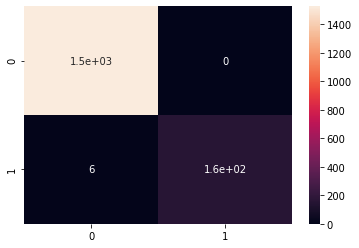

In [ ]:
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test, ypred)
print(cm)
sns.heatmap(cm,annot=True)

In [ ]:
from sklearn.metrics import classification_report
report= classification_report(y_test, ypred.round())
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1527
           1       1.00      0.96      0.98       167

    accuracy                           1.00      1694
   macro avg       1.00      0.98      0.99      1694
weighted avg       1.00      1.00      1.00      1694



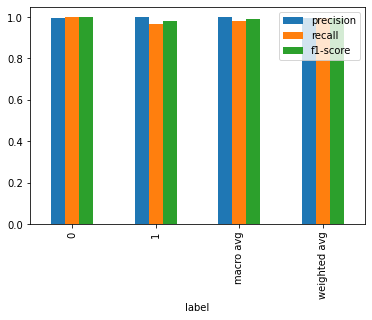

In [ ]:
import pandas as pd

report_data = []
for label, metrics in classification_report(y_test, ypred.round(), output_dict=True).items():
  if label!= 'accuracy':
    metrics['label'] = label
    report_data.append(metrics)

report_df = pd.DataFrame(
    report_data, 
    columns=['label', 'precision', 'recall', 'f1-score', 'support']
)

# Plot as a bar chart.
report_df.plot(y=['precision', 'recall', 'f1-score'], x='label', kind='bar')